In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pylab as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# Data Load
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

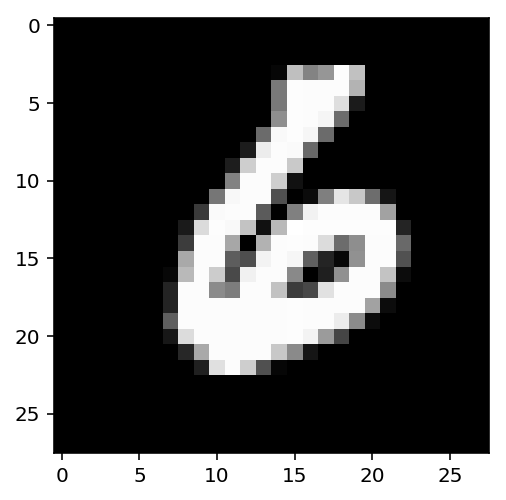

In [3]:
image = mnist.train.images[99]
plt.imshow(image.reshape(28,28), cmap='gray')
plt.show()

## Famous Kernels(Filters)

https://en.wikipedia.org/wiki/Kernel_(image_processing)

위 링크에 소개된 3x3 필터중에 하나를 골라서, `kernel` 을 선언하여 입력과 출력을 비교해보세요.

(3, 3, 1, 1)


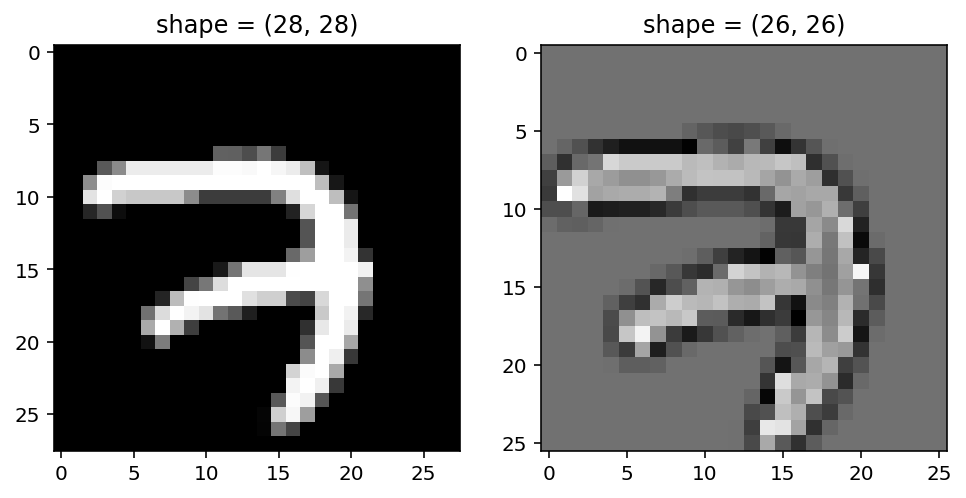

In [5]:
x = tf.placeholder(tf.float32, [None, 784])
x_img = tf.reshape(x, shape=[-1, 28, 28, 1])
# TODO1
kernel_ = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
kernel = kernel_.reshape([3, 3, 1, 1]) # 랭크가 4차원 텐서여야 함 순서대로 가로, 세로, 색상 개수, 필터 개수

print(kernel.shape)
conv_out = tf.nn.conv2d(x_img, kernel, strides=[1, 1, 1, 1], padding='VALID')

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

in_image, out_image = sess.run([x_img, conv_out], feed_dict={x:mnist.train.images[:1]})

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(in_image[0,:,:,0], cmap='gray')
plt.title('shape = ({0}, {1})'.format(in_image.shape[1], in_image.shape[2]))

plt.subplot(1,2,2)
plt.imshow(out_image[0,:,:,0], cmap='gray')
plt.title('shape = ({0}, {1})'.format(out_image.shape[1], out_image.shape[2]))
plt.show()

## Stride와 Padding

`strides`와 `padding`을 바꿔보면서, 출력을 `shape`이 어떻게 변하는지 파악해보세요.


In [6]:
x = tf.placeholder(tf.float32, [None, 784])
x_img = tf.reshape(x, shape=[-1, 28, 28, 1])

# TODO2
conv_out = None

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

in_image, out_image = sess.run([x_img, conv_out], feed_dict={x:mnist.train.images[:1]})

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(in_image[0,:,:,0], cmap='gray')
plt.title('shape = ({0}, {1})'.format(in_image.shape[1], in_image.shape[2]))

plt.subplot(1,2,2)
plt.imshow(out_image[0,:,:,0], cmap='gray')
plt.title('shape = ({0}, {1})'.format(out_image.shape[1], out_image.shape[2]))
plt.show()

TypeError: Fetch argument array([[-1, -1, -1],
       [-1,  8, -1],
       [-1, -1, -1]]) has invalid type <class 'numpy.ndarray'>, must be a string or Tensor. (Can not convert a ndarray into a Tensor or Operation.)

## Max Pooling

In [ ]:
x = tf.placeholder(tf.float32, [None, 784])
x_img = tf.reshape(x, shape=[-1, 28, 28, 1])

# TODO3
max_pooled = tf.layers.max_pooling2d(x_img, 2, 2) # maxpooling은 거의 2 x 2로 설정하는 편

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

in_image, out_image = sess.run([x_img, max_pooled], feed_dict={x:mnist.train.images[:1]})

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(in_image[0,:,:,0], cmap='gray')
plt.title('shape = ({0}, {1})'.format(in_image.shape[1], in_image.shape[2]))

plt.subplot(1,2,2)
plt.imshow(out_image[0,:,:,0], cmap='gray')
plt.title('shape = ({0}, {1})'.format(out_image.shape[1], out_image.shape[2]))
plt.show()